# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv("bank_transactions_data_2.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Setelah melihat data diatas, PreviousTransactionDate dan TransactionDate perlu diganti ke tipe data Datetime.

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


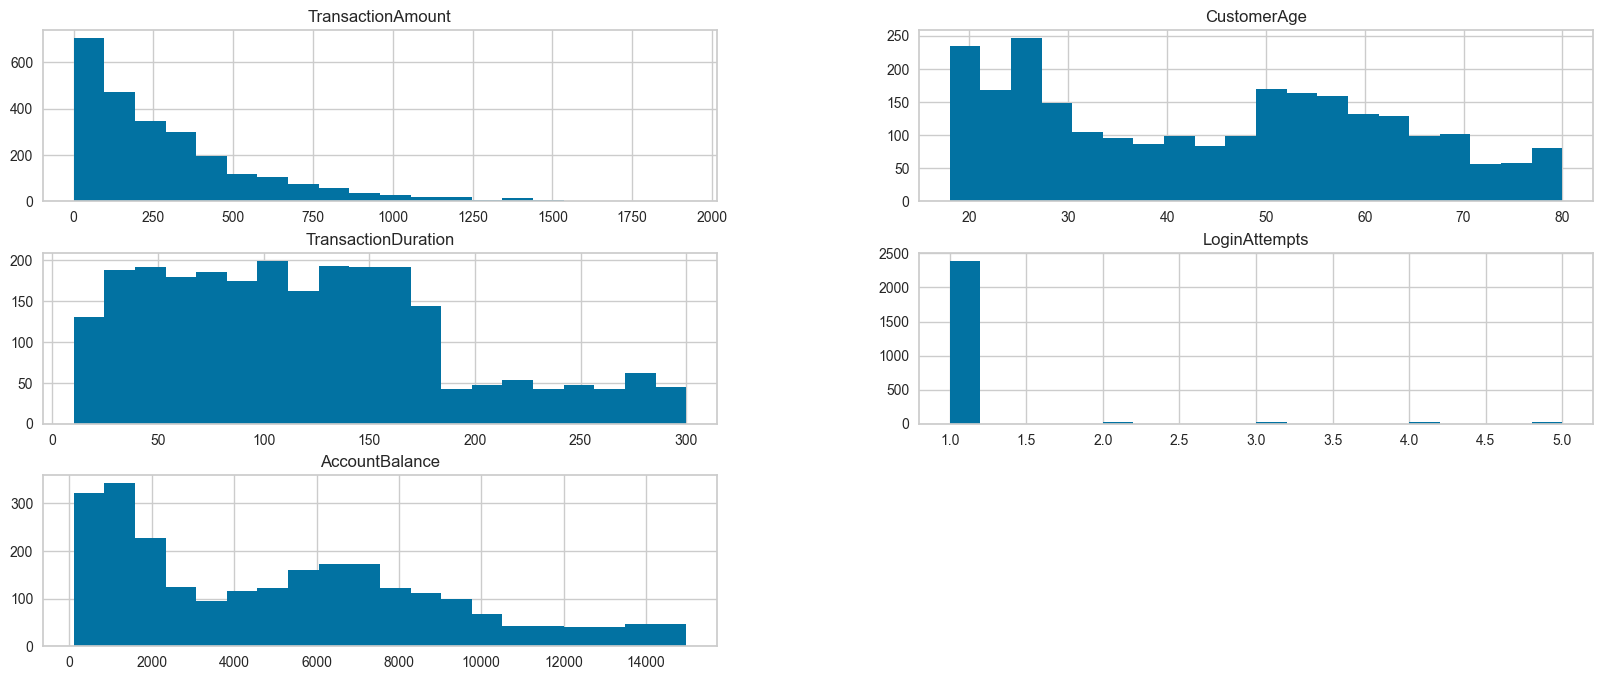

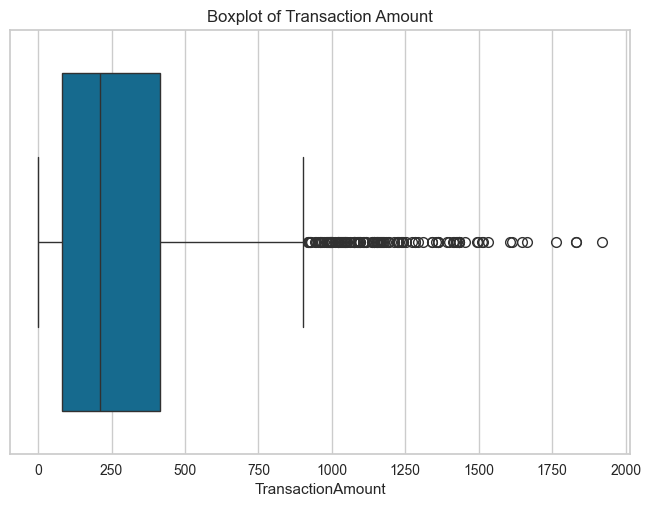

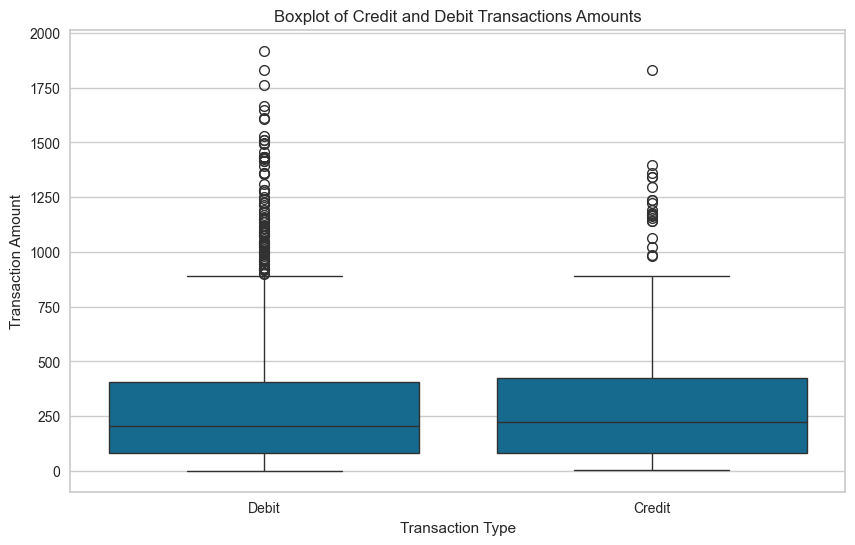

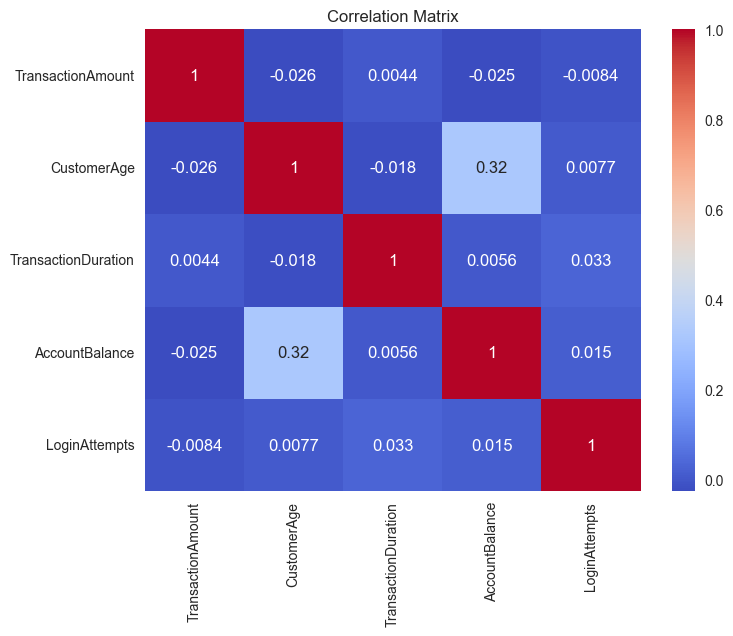

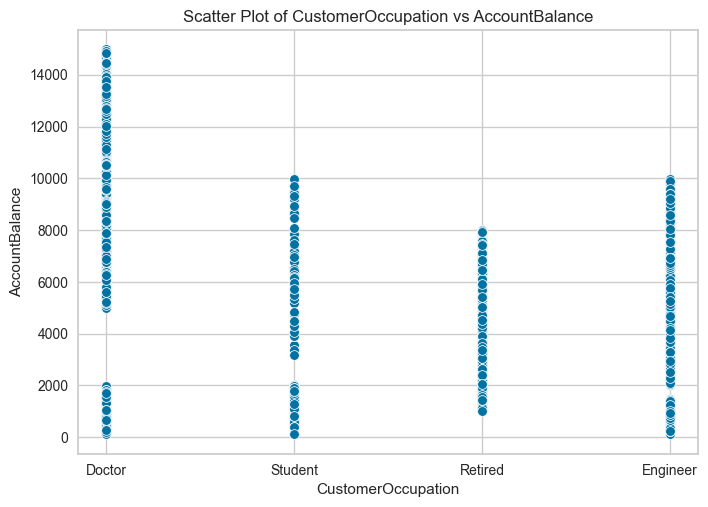

In [4]:
print(df.describe())

df.hist(bins=20, figsize=(20, 8))
plt.show()

sns.boxplot(x=df['TransactionAmount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Boxplot of Credit and Debit Transactions Amounts')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

plt.figure(figsize=(8, 6))
corr_matrix = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.scatterplot(x=df['CustomerOccupation'], y=df['AccountBalance'])
plt.title('Scatter Plot of CustomerOccupation vs AccountBalance')
plt.show()

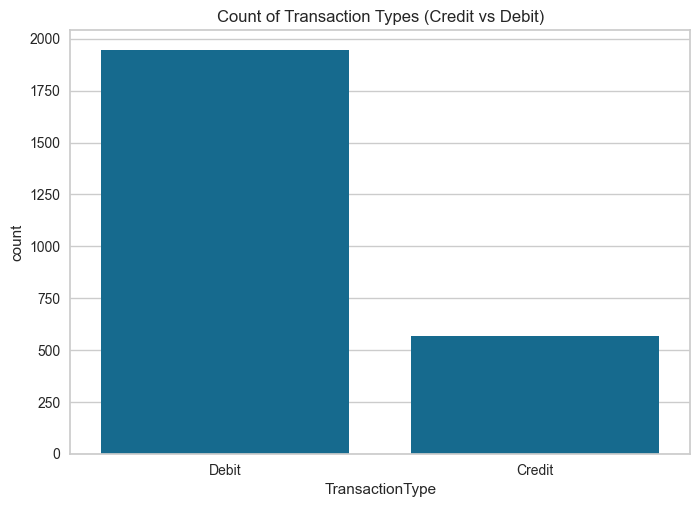

In [5]:
sns.countplot(x=df['TransactionType'])
plt.title('Count of Transaction Types (Credit vs Debit)')
plt.show()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_20576\4259002227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=df, palette='mako', order=top_locations)


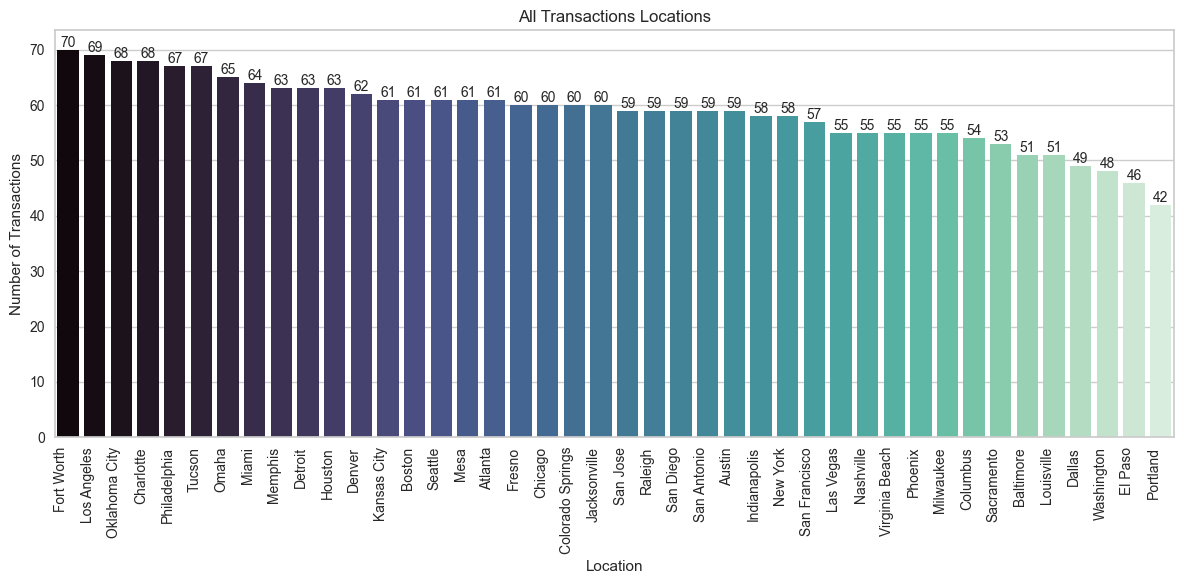

In [6]:
plt.figure(figsize=(12, 6))
plt.title('All Transactions Locations')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')


top_locations = df['Location'].value_counts().index[:-1]  
sns.countplot(x='Location', data=df, palette='mako', order=top_locations)

plt.xticks(rotation=90, ha='right', fontsize=10)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [7]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

print(df.dtypes)
df.head()

Jumlah baris: 2512
Jumlah kolom: 16
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [8]:
LabelEncoder = LabelEncoder()

df['Location_encoded'] = LabelEncoder.fit_transform(df['Location'])
print(df[['Location', 'Location_encoded']].head())

df['Channel_encoded'] = LabelEncoder.fit_transform(df['Channel'])
print(df[['Channel', 'Channel_encoded']].head())

df['TransactionType_encoded'] = LabelEncoder.fit_transform(df['TransactionType'])
print(df[['TransactionType', 'TransactionType_encoded']].head())

    Location  Location_encoded
0  San Diego                36
1    Houston                15
2       Mesa                23
3    Raleigh                33
4    Atlanta                 1
  Channel  Channel_encoded
0     ATM                0
1     ATM                0
2  Online                2
3  Online                2
4  Online                2
  TransactionType  TransactionType_encoded
0           Debit                        1
1           Debit                        1
2           Debit                        1
3           Debit                        1
4          Credit                        0


In [9]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
print(df.dtypes)

df['TimeBetweenTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
df['TransactionHour'] = df['TransactionDate'].dt.hour

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
Location_encoded                    int64
Channel_encoded                     int64
TransactionType_encoded             int64
dtype: object


In [10]:
print(df.isnull().sum())
duplikat = df[df.duplicated()]
print("data yang terduplikat : ",duplikat)


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
Location_encoded           0
Channel_encoded            0
TransactionType_encoded    0
TimeBetweenTransaction     0
TransactionHour            0
dtype: int64
data yang terduplikat :  Empty DataFrame
Columns: [TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate, Location_encoded, Channel_encoded, TransactionType_encoded, TimeBetweenTransaction, T

In [11]:
fiturKategorikal = ['TransactionType_encoded', 'Location_encoded','Channel_encoded']
fiturNumerik = ['AccountBalance', 'TransactionDuration','TransactionAmount', 'LoginAttempts', 'CustomerAge']

In [12]:

numericValue = df[fiturNumerik]
numericValue = numericValue.fillna(numericValue.median())  
scaler = StandardScaler()
scaledNumVal = scaler.fit_transform(numericValue)

catValue = pd.get_dummies(df[fiturKategorikal], drop_first=True) 

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

mengelompokkan berdasarkan fiturnya

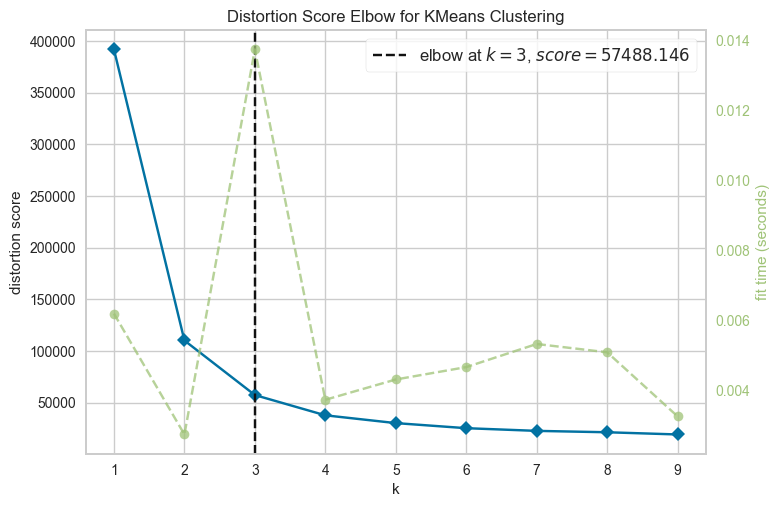

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:

combinedValue = np.hstack((scaledNumVal, catValue.values))

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(combinedValue)
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [21]:
cluster = 3
kmeans = KMeans(n_clusters=cluster, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(combinedValue)

silhouette_avg = silhouette_score(combinedValue, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5036


mencoba jika cluster yang digunakan adalah pembagian 4 cluster

mencoba jika 6 cluster

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [15]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

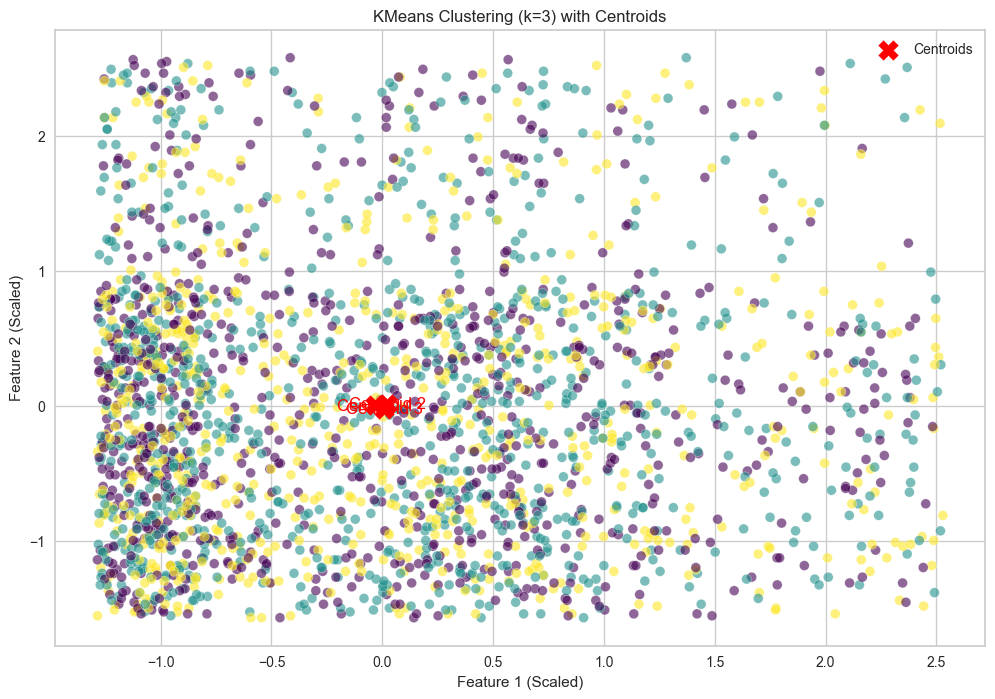

In [23]:
df['Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_
plt.figure(figsize=(12, 8))
plt.scatter(combinedValue[:, 0], combinedValue[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('KMeans Clustering (k=3) with Centroids')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

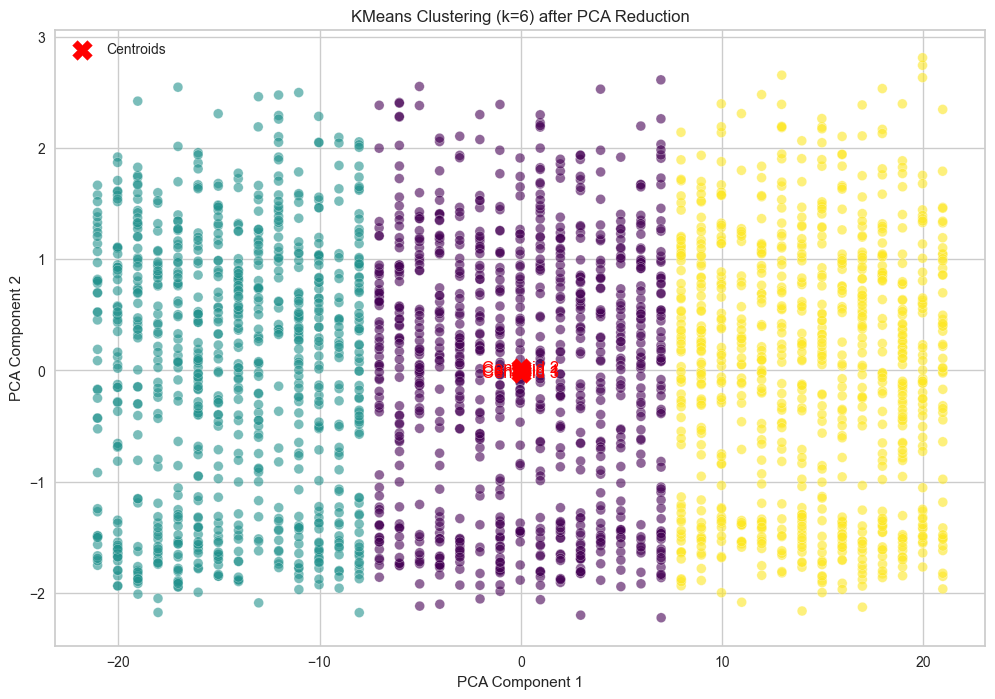

In [17]:
pca = PCA(n_components=2)
dataPca = pca.fit_transform(combinedValue)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(dataPca)
df['Cluster_PCA'] = kmeans_pca.labels_
centroids_pca = pca.inverse_transform(kmeans_pca.cluster_centers_)
plt.figure(figsize=(12, 8))

plt.scatter(dataPca[:, 0], dataPca[:, 1], c=kmeans_pca.labels_, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('KMeans Clustering (k=6) after PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [22]:
kmeans = KMeans(n_clusters=3)
cluster=kmeans.fit(combinedValue)

df['Cluster'] = kmeans.labels_
df['DistanceToCentroid'] = np.linalg.norm(combinedValue - kmeans.cluster_centers_[kmeans.labels_], axis=1)
threshold = df['DistanceToCentroid'].quantile(0.98)
df['PotentialFraud'] = df['DistanceToCentroid'] > threshold
fraud_df = df[df['PotentialFraud']].copy()
print('Total Potential Frauds',fraud_df.shape[0] )
fraud_df

Total Potential Frauds 51


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,PreviousTransactionDate,Location_encoded,Channel_encoded,TransactionType_encoded,TimeBetweenTransaction,TransactionHour,Cluster,Cluster_PCA,DistanceToCentroid,PotentialFraud
134,TX000135,AC00349,381.33,2023-08-21 16:46:05,Debit,Albuquerque,D000635,62.251.170.72,M034,ATM,...,2024-11-04 08:09:32,0,0,1,-38071407.0,16,1,1,7.991853,True
147,TX000148,AC00161,514.95,2023-04-13 18:37:48,Debit,New York,D000109,23.92.205.75,M056,Online,...,2024-11-04 08:10:01,27,2,1,-49296733.0,18,0,0,7.979767,True
151,TX000152,AC00242,332.93,2023-11-20 16:29:48,Credit,Albuquerque,D000548,113.115.81.178,M039,Branch,...,2024-11-04 08:08:14,0,1,0,-30209906.0,16,1,1,8.153489,True
181,TX000182,AC00149,453.54,2023-04-19 16:36:03,Debit,Albuquerque,D000150,223.32.70.156,M017,ATM,...,2024-11-04 08:12:06,0,0,1,-48785763.0,16,1,1,8.018543,True
274,TX000275,AC00454,1176.28,2023-12-20 16:08:02,Credit,Kansas City,D000476,50.202.8.53,M074,ATM,...,2024-11-04 08:11:44,18,0,0,-27619422.0,16,0,0,8.639801,True
344,TX000345,AC00156,1271.90,2023-08-28 16:43:15,Debit,Houston,D000312,210.136.14.108,M073,ATM,...,2024-11-04 08:09:27,15,0,1,-37466772.0,16,1,0,8.169672,True
373,TX000374,AC00264,144.77,2023-07-17 16:48:23,Debit,Albuquerque,D000194,57.166.147.242,M007,Online,...,2024-11-04 08:10:54,0,2,1,-41095351.0,16,1,1,7.993950,True
417,TX000418,AC00274,775.23,2023-08-07 16:40:02,Credit,Albuquerque,D000220,112.222.0.29,M036,Online,...,2024-11-04 08:07:01,0,2,0,-39281219.0,16,1,1,8.091394,True
428,TX000429,AC00182,677.29,2023-05-01 18:28:00,Debit,Houston,D000016,49.172.82.247,M015,Online,...,2024-11-04 08:07:16,15,2,1,-47741956.0,18,1,0,8.028293,True
463,TX000464,AC00417,302.16,2023-10-18 17:47:52,Debit,Kansas City,D000123,84.237.126.96,M014,Online,...,2024-11-04 08:07:38,18,2,1,-33056386.0,17,0,0,8.179626,True


Tulis hasil interpretasinya di sini.
berdasarkan hasil clustering yang menggunakan 6 cluster, ditemukan bahwa ad 51 outlier yang dapat di interpretasikan sebagai 51 potensi fraud. 

In [26]:
analisisCluster = df.groupby("Cluster").agg({
    "TransactionDuration": ["mean", "min", "max"],
    "AccountBalance":["mean","min","max"],
    "TransactionDuration":["mean","min","max"],
    "TransactionAmount": ["mean", "min", "max"],
    "LoginAttempts":["mean","min","max"]
}).reset_index()

cluster_counts = df["Cluster"].value_counts().sort_index()
print(analisisCluster)
print(cluster_counts)

  Cluster TransactionDuration          AccountBalance                    \
                         mean min  max           mean     min       max   
0       0          119.971530  10  300    4985.759253  101.25  14798.10   
1       1          120.636853  10  300    5202.591929  117.98  14942.78   
2       2          118.025641  10  296    5149.971242  102.20  14977.99   

  TransactionAmount                LoginAttempts          
               mean   min      max          mean min max  
0        296.858600  0.26  1762.28      1.148280   1   5  
1        293.134494  0.32  1831.02      1.123922   1   5  
2        304.014791  1.41  1919.11      1.098516   1   5  
Cluster
0    843
1    928
2    741
Name: count, dtype: int64


Cluster 1:
Rata-rata Durasi Transaksi (detik): 119.97

Rata-rata Saldo Akun: 4985.76

Rata-rata Jumlah Transaksi: 296.86

Rata-rata Upaya Login: 1.15

Jumlah Data: 843

Analisis: Cluster ini menggambarkan kelompok dengan durasi transaksi yang moderat dan saldo akun yang lebih rendah dibandingkan dengan cluster lainnya. Dengan jumlah data yang relatif banyak, cluster ini mungkin mewakili kelompok dengan daya beli menengah dan frekuensi transaksi yang cukup tinggi, meskipun upaya login mereka masih relatif rendah.

Cluster 2:
Rata-rata Durasi Transaksi (detik): 120.64

Rata-rata Saldo Akun: 5202.59

Rata-rata Jumlah Transaksi: 293.13

Rata-rata Upaya Login: 1.12

Jumlah Data: 928

Analisis: Cluster ini mewakili kelompok dengan saldo akun yang lebih tinggi dan durasi transaksi yang serupa dengan cluster 0. Namun, jumlah data yang lebih banyak menunjukkan bahwa cluster ini memiliki daya beli yang sedikit lebih tinggi. Kelompok ini mungkin terdiri dari individu dengan pengeluaran menengah yang lebih sering melakukan transaksi dibandingkan dengan kelompok dengan daya beli rendah.

Cluster 3:
Rata-rata Durasi Transaksi (detik): 118.03

Rata-rata Saldo Akun: 5149.97

Rata-rata Jumlah Transaksi: 304.01

Rata-rata Upaya Login: 1.10

Jumlah Data: 741

Analisis: Cluster ini memiliki durasi transaksi yang sedikit lebih rendah dibandingkan dengan dua cluster lainnya. Meskipun saldo akun mereka hampir setara dengan cluster 1, cluster ini memiliki jumlah transaksi yang sedikit lebih tinggi. Ini mengindikasikan kelompok dengan pengeluaran relatif lebih tinggi namun dengan frekuensi login yang cukup rendah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
output_file = 'bfdetection.csv'
df.to_csv(output_file, index=False)

print(f"Hasil clustering disimpan ke: {output_file}")


Hasil clustering disimpan ke: bfdetection.csv
